<h3> Assignment - 5 </h3>


 Original 



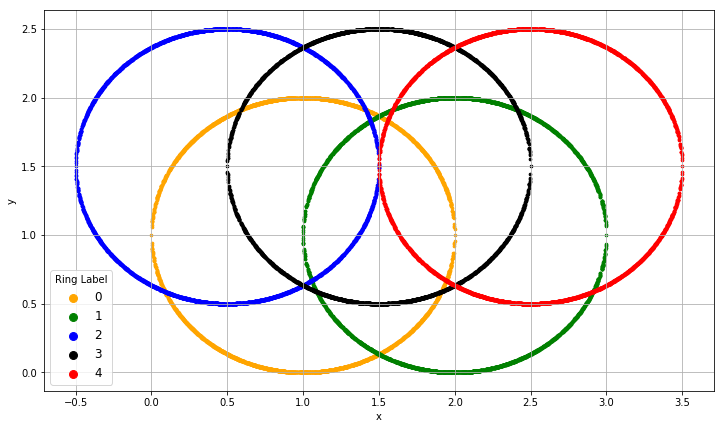

In [14]:
import pandas 
import numpy 
import matplotlib.pyplot as plt
import statsmodels.api as smodel
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import sklearn.metrics as metrics
import sklearn.tree as tree


#Read the original data and visualize it 
ringsdata=pandas.read_csv('FiveRing.csv')
rings=ringsdata.dropna()
print("\n Original \n")
predData=rings[['x','y']]
targetData=rings[['ring']]
count=len(rings)

#Visualization
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = rings[rings['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

In [15]:
#Decision Tree Classifier for analysis with given specifications

classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
treeFit = classTree.fit(predData, targetData)
treePredProb = classTree.predict_proba(predData)
treePredClass= classTree.predict(predData)
accuracy = classTree.score(predData, targetData)
print('Accuracy = ', accuracy)

Accuracy =  0.5358820589705148


<h3> Ans - 1(a) </h3>

In [16]:
print("Misclassification Rate = {:.6f}".format(1-accuracy))

Misclassification Rate = 0.464118


<h3> Ans - 1(b) </h3>

In [17]:
RASE=0
for i in range(count):
    for j in range (5):
        if(targetData['ring'].iloc[i]==j):
            RASE += (1.0 - treePredProb[i][j])**2
        else:
            RASE += (0.0 - treePredProb[i][j])**2
RASE = numpy.sqrt(RASE / (2*count))
print("Root Average Squared Error = {:.6f}".format(RASE))


Root Average Squared Error = 0.550792


<h3> Ans - 1(c) </h3>

In [18]:
ringstreePred=rings.drop(columns='ring')
ringstreePred['ring']=treePredClass


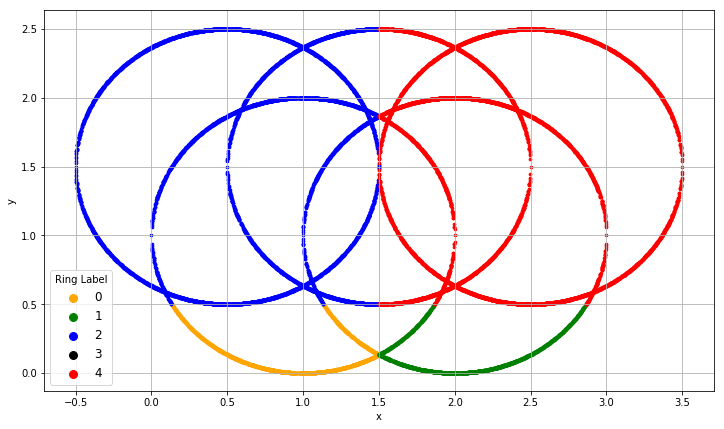

In [19]:
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = ringstreePred[ringstreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3> Ans - 1(d) </h3>

In [20]:
#Aggregate the model using the accuracy

def dataframe(list1,list2,list3,list4,list5):
        
        df0=pandas.DataFrame(list1).T
        df0['sum']=df0.sum(axis=1)
        df0['Prob0']=df0['sum']/sum(listacc)
         
        df1=pandas.DataFrame(list2).T
        df1['sum']=df1.sum(axis=1)
        df1['Prob1']=df1['sum']/sum(listacc)
        
        df2=pandas.DataFrame(list3).T
        df2['sum']=df2.sum(axis=1)
        df2['Prob2']=df2['sum']/sum(listacc)
        
        df3=pandas.DataFrame(list4).T
        df3['sum']=df3.sum(axis=1)
        df3['Prob3']=df3['sum']/sum(listacc)
        
        df4=pandas.DataFrame(list5).T
        df4['sum']=df4.sum(axis=1)
        df4['Prob4']=df4['sum']/sum(listacc)
       
        probdf=pandas.DataFrame()
        probdf[0]=df0['Prob0']
        probdf[1]=df1['Prob1']
        probdf[2]=df2['Prob2']
        probdf[3]=df3['Prob3']
        probdf[4]=df4['Prob4']
        probdf['ring']=probdf.idxmax(axis=1).astype(int)

        return(probdf)



In [21]:
#Calculation of Misclassification Rate and Root Average Sqaured Error for aggregated boosting model

def Metrics(PredProb,treepredProb):
    #print("Misclassification Rate = {:.6f}".format(1-accuracy))
    MSR=0
    for i in range (count):
            if(treepredProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):   
                MSR+=1  
    MissClass=MSR/count
    print("Misclassification Rate = {:.6f}".format(MissClass))

    RASE=0
    for i in range(count):
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                RASE += (1.0 - PredProb[i][j])**2
            else:
                RASE += (0.0 - PredProb[i][j])**2
    RASE = numpy.sqrt(RASE / (2*count))
    print("Root Average Squared Error = {:.6f}".format(RASE))

<h4>Boosting the Model</h4>

<h3>Boosting for 10 iterations</h3>

In [35]:

#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 10 iterations
for iter in range(10):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    
        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    print('Accuracy = ', accuracy)
#print(listacc)

0
Accuracy =  0.5358820589705148
1
Accuracy =  0.6049316248519436
2
Accuracy =  0.7450667037242913
3
Accuracy =  0.6049316248519436
4
Accuracy =  0.7450667037242913
5
Accuracy =  0.6049316248519436
6
Accuracy =  0.7450667037242913
7
Accuracy =  0.6049316248519436
8
Accuracy =  0.7450667037242913
9
Accuracy =  0.6049316248519436


In [36]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.493453
Root Average Squared Error = 0.552826


In [37]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

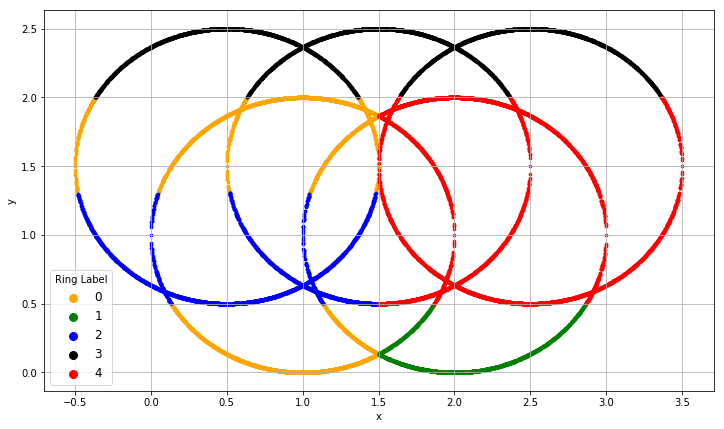

In [38]:
#Plotting the graph based on the predicted classes obtained through boosting
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 100 iterations</h3>

In [26]:

#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 100 iterations
for iter in range(100):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 

    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    
        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    print('Accuracy = ', accuracy)
#print(listacc)

0
Accuracy =  0.5358820589705148
1
Accuracy =  0.6049316248519436
2
Accuracy =  0.7450667037242913
3
Accuracy =  0.6049316248519436
4
Accuracy =  0.7450667037242913
5
Accuracy =  0.6049316248519436
6
Accuracy =  0.7450667037242913
7
Accuracy =  0.6049316248519436
8
Accuracy =  0.7450667037242913
9
Accuracy =  0.6049316248519436
10
Accuracy =  0.7450667037242913
11
Accuracy =  0.6049316248519436
12
Accuracy =  0.7450667037242913
13
Accuracy =  0.6049316248519436
14
Accuracy =  0.7450667037242913
15
Accuracy =  0.6049316248519436
16
Accuracy =  0.7450667037242913
17
Accuracy =  0.6049316248519436
18
Accuracy =  0.7450667037242913
19
Accuracy =  0.6049316248519436
20
Accuracy =  0.7450667037242913
21
Accuracy =  0.6049316248519436
22
Accuracy =  0.7450667037242913
23
Accuracy =  0.6049316248519436
24
Accuracy =  0.7450667037242913
25
Accuracy =  0.6049316248519436
26
Accuracy =  0.7450667037242913
27
Accuracy =  0.6049316248519436
28
Accuracy =  0.7450667037242913
29
Accuracy =  0.6049316

In [27]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550271


In [28]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

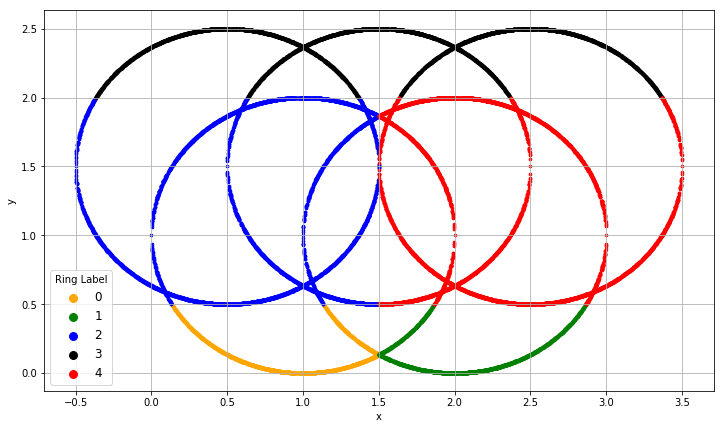

In [29]:
#Plotting the graph based on the predicted classes obtained through boosting

carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 200 iterations</h3>

In [15]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 200 iterations
for iter in range(200):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
   
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    
        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    print('Accuracy = ', accuracy)


0
Accuracy =  0.5358820589705148
1
Accuracy =  0.6049316248519436
2
Accuracy =  0.7450667037242913
3
Accuracy =  0.6049316248519436
4
Accuracy =  0.7450667037242913
5
Accuracy =  0.6049316248519436
6
Accuracy =  0.7450667037242913
7
Accuracy =  0.6049316248519436
8
Accuracy =  0.7450667037242913
9
Accuracy =  0.6049316248519436
10
Accuracy =  0.7450667037242913
11
Accuracy =  0.6049316248519436
12
Accuracy =  0.7450667037242913
13
Accuracy =  0.6049316248519436
14
Accuracy =  0.7450667037242913
15
Accuracy =  0.6049316248519436
16
Accuracy =  0.7450667037242913
17
Accuracy =  0.6049316248519436
18
Accuracy =  0.7450667037242913
19
Accuracy =  0.6049316248519436
20
Accuracy =  0.7450667037242913
21
Accuracy =  0.6049316248519436
22
Accuracy =  0.7450667037242913
23
Accuracy =  0.6049316248519436
24
Accuracy =  0.7450667037242913
25
Accuracy =  0.6049316248519436
26
Accuracy =  0.7450667037242913
27
Accuracy =  0.6049316248519436
28
Accuracy =  0.7450667037242913
29
Accuracy =  0.6049316

In [16]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550166


In [17]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

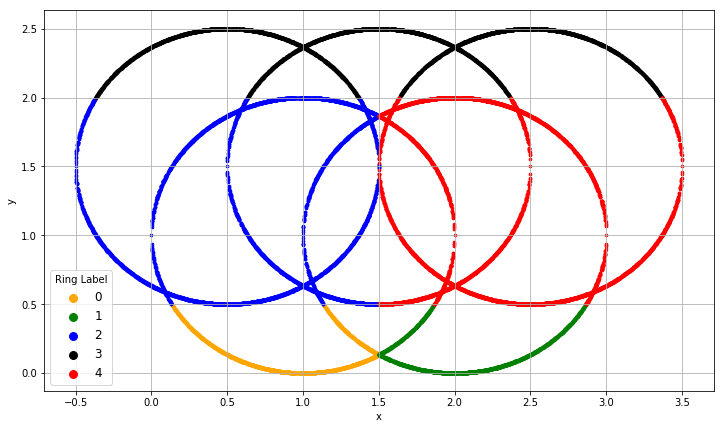

In [18]:
#Plotting the graph based on the predicted classes obtained through boosting

carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 300 iterations</h3>

In [20]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 300 iterations
for iter in range(300):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    s
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
  
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    
        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [21]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550131


In [22]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

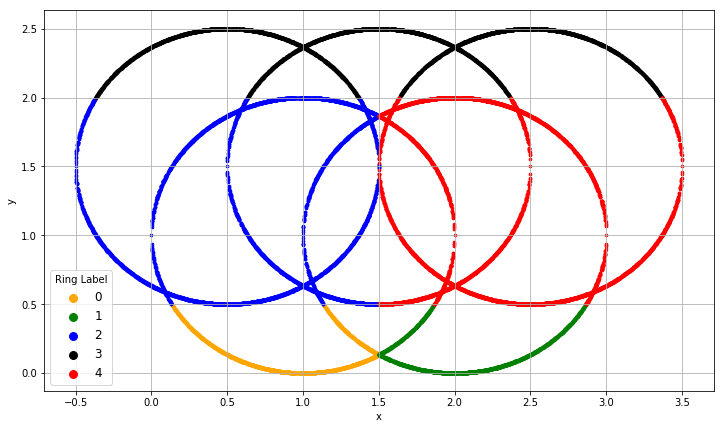

In [23]:
#Plotting the graph based on the predicted classes obtained through boosting

carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 400 iterations</h3>

In [32]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 400 iterations
for iter in range(400):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    
        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [33]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550114


In [34]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

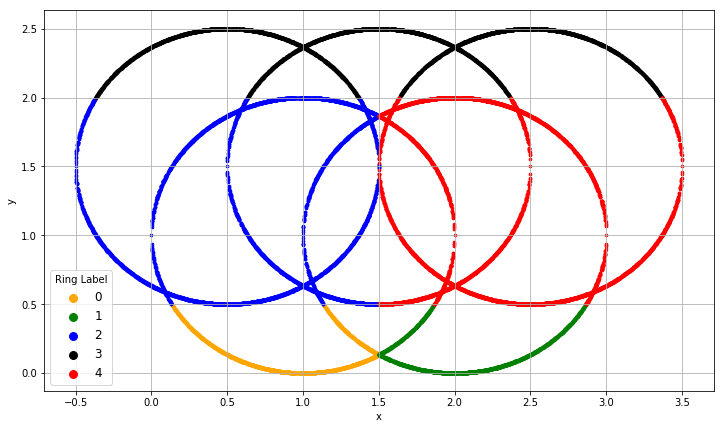

In [35]:
#Plotting the graph based on the predicted classes obtained through boosting

carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 500 iterations</h3>

In [36]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 500 iterations
for iter in range(500):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    

        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550104


In [41]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

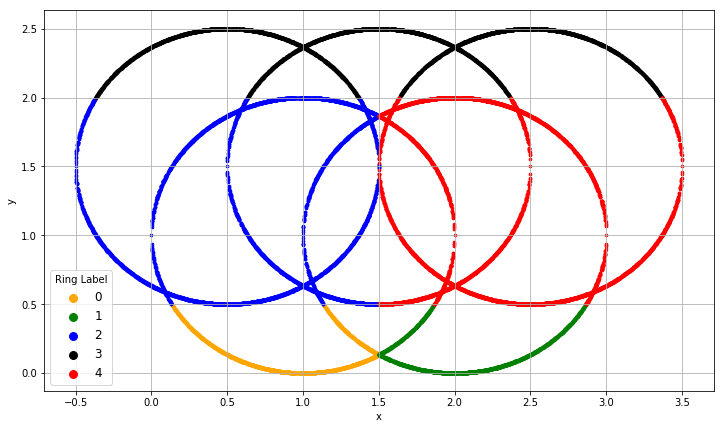

In [42]:
#Plotting the graph based on the predicted classes obtained through boosting

carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 600 iterations</h3>

In [43]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 600 iterations
for iter in range(600):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
        
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    

        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [44]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550098


In [45]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

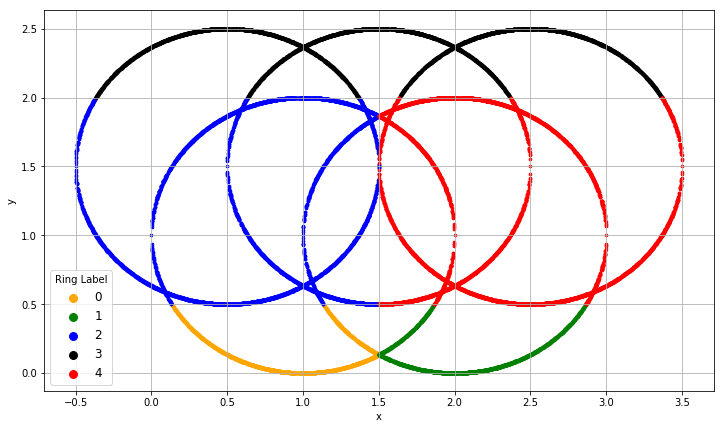

In [46]:
#Plotting the graph based on the predicted classes obtained through boosting
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 700 iterations</h3>

In [47]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 700 iterations
for iter in range(700):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
   
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    

        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [48]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550093


In [49]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

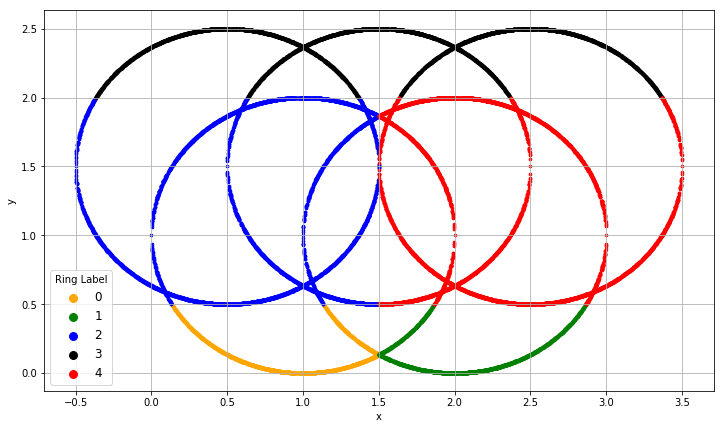

In [50]:
#Plotting the graph based on the predicted classes obtained through boosting
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 800 iterations</h3>

In [9]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 800 iterations
for iter in range(800):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    
        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550089


In [11]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

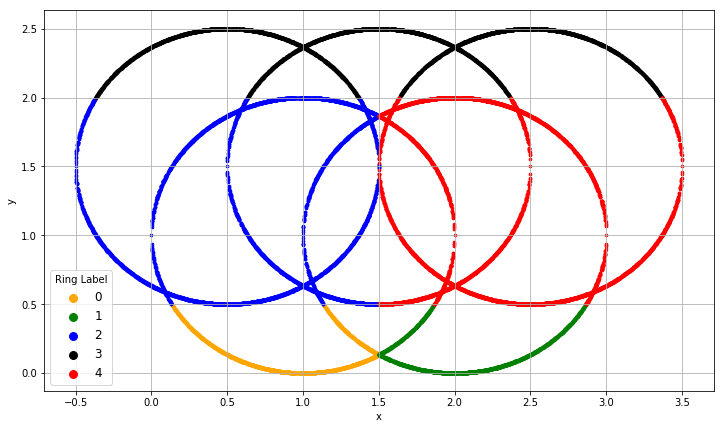

In [12]:
#Plotting the graph based on the predicted classes obtained through boosting
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 900 iterations</h3>

In [22]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 900 iterations
for iter in range(900):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    

        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550086


In [24]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

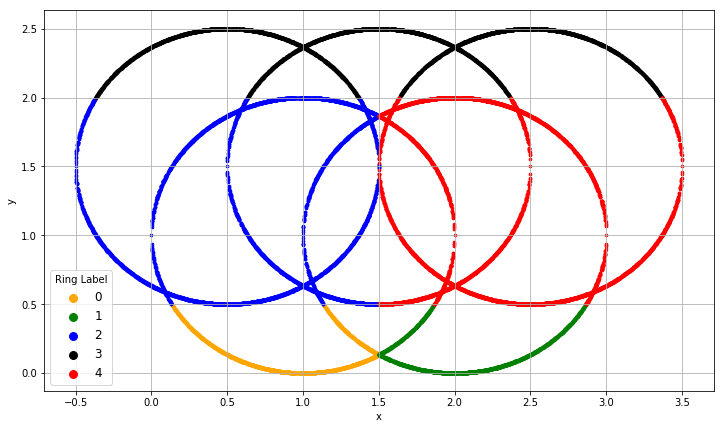

In [25]:
#Plotting the graph based on the predicted classes obtained through boosting

carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()

<h3>Boosting for 1000 iterations</h3>

In [51]:
#Intialzation of weights with one 

weights = numpy.ones(20010,dtype = float)

listacc=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]

#Boosting for 1000 iterations
for iter in range(1000):
    print(iter)
    classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20190415)
    treeFit = classTree.fit(predData, targetData, weights)
    treePredProb = classTree.predict_proba(predData)
    accuracy = classTree.score(predData, targetData, weights)
    
    treeboostProb=pandas.DataFrame(treePredProb)
    treeboostProb['ring']=treeboostProb.idxmax(axis=1).astype(int) 
    
    for i in range(count): 
        eventError = 0
        for j in range (5):
            if(targetData['ring'].iloc[i]==j):
                eventError+= 1.0 - treePredProb[i][j]
            else:
                eventError+= 0.0 - treePredProb[i][j]
        eventError=eventError*(1/5)
    
        if (treeboostProb['ring'].iloc[i]!=targetData['ring'].iloc[i]):
            weights[i]= 1+ numpy.abs(eventError)
        else:
            weights[i]= numpy.abs(eventError)
            
#Aggregating model output for each iteration on the basis of accuracy of each iteration 
    for j in range (5):
            if (j==0):
                list1.append(accuracy*treePredProb[:,0])
            elif(j==1):
                list2.append(accuracy*treePredProb[:,1])
            elif(j==2):
                list3.append(accuracy*treePredProb[:,2])
            elif(j==3):
                list4.append(accuracy*treePredProb[:,3])
            elif(j==4):
                list5.append(accuracy*treePredProb[:,4])
    
    listacc.append(accuracy)
    #print('Accuracy = ', accuracy)
#print(listacc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [52]:
#Probability obatianed through aggregrated model 
probdf=dataframe(list1,list2,list3,list4,list5)

#Calculation of Metrics for boosting
accuracy=metrics.accuracy_score(targetData['ring'],probdf['ring'])
predprob=probdf.drop(columns='ring')
Metrics(predprob.values,probdf)

Misclassification Rate = 0.549325
Root Average Squared Error = 0.550084


In [53]:
boosttreePred=rings.drop(columns='ring')
boosttreePred['ring']=probdf['ring']

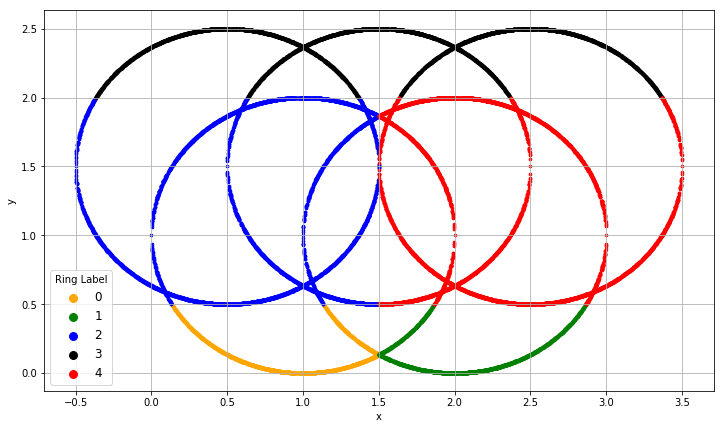

In [54]:
#Plotting the graph based on the predicted classes obtained through boosting
carray = ['orange', 'green', 'blue','black','red']
plt.figure(figsize=(12,7))
for i in range(5):
    subData = boosttreePred[boosttreePred['ring'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis(aspect = 'equal')
plt.legend(title = 'Ring Label', fontsize = 12, markerscale = 3)
plt.show()